In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data
data = pd.read_csv('Molecular-data.csv')
data

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456
5,24.931968,5.559
6,26.612291,5.208
7,26.694301,5.192
8,26.434639,5.243
9,26.495280,5.231


In [3]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

# Collect input feature for training, molar volume value in this case
train_features = train_dataset.copy() #dataframe type
test_features = test_dataset.copy()

# Collect respective label, density value in this case
train_labels = train_features.pop('Density') # series type
test_labels = test_features.pop('Density')

In [4]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
def plot_density(x, y):
  plt.scatter(train_features['Molar volume'], train_labels, label='Data')
  plt.plot(x, y, color='r', label='Predictions')
  plt.xlabel('Molar volume')
  plt.ylabel('Density')
  plt.legend()

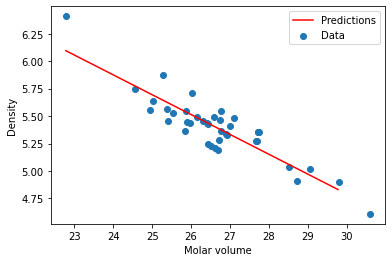

In [17]:
x = np.arange(train_features['Molar volume'].min(), train_features['Molar volume'].max()).reshape(-1, 1)
pred = model.predict(x)
plot_density(x,pred)

In [18]:
pred

array([6.09562409, 5.9149834 , 5.7343427 , 5.55370201, 5.37306131,
       5.19242062, 5.01177992, 4.83113923])

In [20]:
pred_y = model.predict(train_features)
pred_y

array([5.44011395, 5.69081119, 5.62740726, 5.20449383, 5.42150128,
       5.35252065, 4.82515212, 4.95919288, 5.45847455, 5.62162278,
       5.20630727, 5.21199802, 5.37426817, 6.09562409, 5.52027736,
       5.38829646, 5.59753999, 5.20168889, 5.19981718, 5.05807606,
       5.77421537, 5.38044144, 5.40595939, 5.02386986, 5.31595894,
       5.43660059, 5.64275344, 5.43520204, 4.68177893, 5.53558795,
       5.7066455 , 5.38254244, 5.51149539, 5.37334295, 5.54117843,
       5.53061366, 5.33219573, 5.34614073, 5.40311083, 5.48618242])

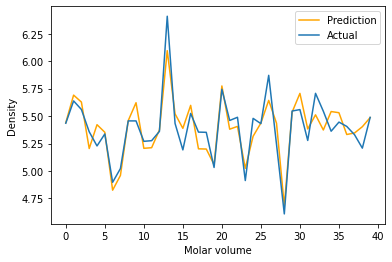

In [21]:
actual_trend=train_labels.values
plt.plot(pred_y, color='orange', label='Prediction')
plt.plot(actual_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

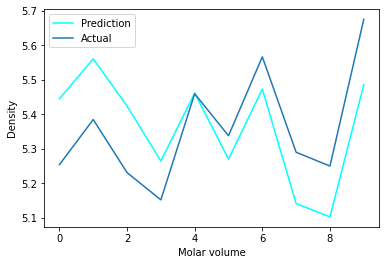

In [23]:
pred_test = model.predict(test_features)
actual_test_trend=test_labels.values
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

In [28]:
differences = (1 - sum(abs(pred_test - actual_test_trend))/len(actual_test_trend)) * 100
pred_accuracy = differences.item()
pred_accuracy

86.76726943834039